[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


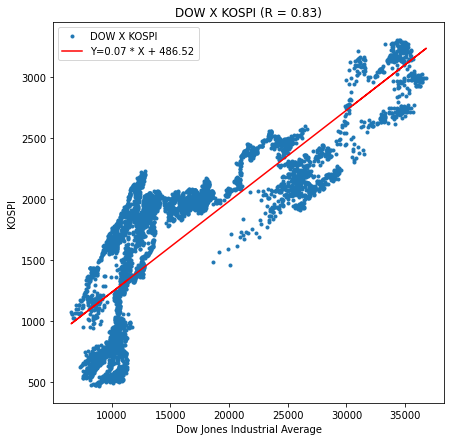

In [1]:
# 파이썬으로 주식(ETF) 간 상관관계 구하기(회귀 분석)
# https://dotsnlines.tistory.com/591?category=1028593

import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pylab as plt
 
dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')
 
df = pd.DataFrame({'X':dow['Close'],'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
 
regr = stats.linregress(df.X, df.Y)
regr_line = f'Y={regr.slope:.2f} * X + {regr.intercept:.2f}'
 
plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept,'r')
plt.legend(['DOW X KOSPI', regr_line])
plt.title(f'DOW X KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


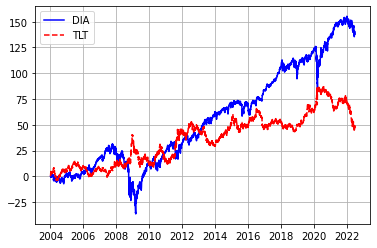

In [2]:
# 파이썬을 이용해서 주식/ETF의 누적 수익률 비교하기
# https://dotsnlines.tistory.com/588?category=1028593

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
 
a = pdr.get_data_yahoo('DIA', start='2004-01-04') # Date, Open High, Low, Close, Adj Close, Volume
b = pdr.get_data_yahoo('TLT', start='2004-01-04')
 
a_dpc = (a['Close']/a['Close'].shift(1) - 1)*100 # 당일 종가 / 이전 종가 비율로 증감 계산
a_dpc.iloc[0] = 0                                # 첫번째 열에 nan 대신 0 입력
 
b_dpc = (b['Close']/b['Close'].shift(1) - 1)*100
b_dpc.iloc[0] = 0
 
a_dpc_cs = a_dpc.cumsum() # 수익률을 누적 합산
b_dpc_cs = b_dpc.cumsum()
 
plt.plot(a.index, a_dpc_cs, 'b', label='DIA')   # 수익 시계열 데이터의 인덱스인 일자 기반으로 수익률 출력
plt.plot(b.index, b_dpc_cs, 'r--', label='TLT')
plt.grid(True)
plt.legend(loc='best')
plt.show()


In [2]:
import dart_fss as dart

# Open Dart API Key 셋팅
api_key = '187b485b804f12be498e388ef5b47790f2f3e8a5'
dart.set_api_key(api_key=api_key)

# Dart에 공시된 회사 목록 조회
corp_list = dart.get_corp_list()

company_name = '삼성전자'
company = corp_list.find_by_corp_name(company_name, exactly=True, market='Y')[0]
fs = company.extract_fs(bgn_de='20120101')

# 연결재무상태표:bs, 연결손익계산서:is, 연결포괄손익계산서:cis, 현금흐름표:cf
df_bs = fs['bs'] # 또는 df = fs[0] 또는 df = fs.show('bs')
print('연결재무상태표:bs')
print(df_bs.head())
df_is = fs['is']
print('연결손익계산서:is')
print(df_is.head())
df_cis = fs['cis']
print('연결포괄손익계산서:cis')
print(df_cis.head())
df_cf = fs['cf']
print('현금흐름표:cf')
print(df_cf.head())

fs.save(company_name + '.xlsx') # 재무제표 일괄 저장 

Annual reports:   0%|          | 0/11 [00:00<?, ?report/s]

연결재무상태표:bs
  [D210000] Statement of financial position, current/non-current - Consolidated financial statements (Unit: KRW)  \
                                                                                                      concept_id   
0                            ifrs-full_CurrentAssets                                                               
1                   ifrs-full_CashAndCashEquivalents                                                               
2  dart_ShortTermDepositsNotClassifiedAsCashEquiv...                                                               
3  entity00126380_udf_BS_201851017339116_CurrentA...                                                               
4  ifrs-full_CurrentFinancialAssetsAtFairValueThr...                                                               

                                                                       \
          label_ko                                           label_en   
0             유동자산            

'd:\\Works\\projects\\py-quant-study\\code\\learn\\fsdata\\삼성전자.xlsx'

In [3]:
from openpyxl import Workbook, load_workbook
import pandas as pd
 

# Company that you find
file = 'fsdata/삼성전자.xlsx'
 
wb = load_workbook(file)
 
# 재무상태표 시트 지정
ws_bs = wb['Data_bs']
 
# 년도 가져오기
y_list = []
c = 10
while ws_bs.cell(2, c).value != None:
    y = ws_bs.cell(1, c).value
    if y[:1] == '2':
        y_list.append(y)
    c += 1
 
# 가져올 항목 List로 만들기
bs_items = ['ifrs-full_Assets', 'ifrs-full_CurrentAssets', 'ifrs-full_CashAndCashEquivalents', 'dart_ShortTermTradeReceivable',
            'entity00126380_udf_BS_201710182279121_CurrentAssets', 'ifrs-full_Inventories', 'ifrs-full_Liabilities',
            'ifrs-full_CurrentLiabilities', 'ifrs-full_ShorttermBorrowings', 'ifrs-full_Equity', 'ifrs-full_IssuedCapital',
            'ifrs-full_RetainedEarnings']
 
# 재무상태표 Data 가져오기
df_list = []
for bs_item in bs_items:
    temp_list = []
    r = 4
    while ws_bs.cell(r,2).value != None:
        if ws_bs.cell(r,2).value == bs_item:
            item = ws_bs.cell(r, 3).value
            c = 10
            while ws_bs.cell(1,c).value != None:
                temp_list.append(ws_bs.cell(r,c).value)
                c += 1
        r += 1
    df = pd.DataFrame({item : temp_list}, index=y_list)
    df_list.append(df)
 
total_df = pd.concat(df_list, axis=1)
total_df = total_df.transpose()
 
print(total_df)
total_df.to_excel('fsdata/재무상태표.xlsx')


                   20211231         20201231         20191231  \
자산총계        426621158000000  378235718000000  352564497000000   
유동자산        218163185000000  198215579000000  181385260000000   
현금및현금성자산     39031415000000   29382578000000   26885999000000   
매출채권         40713415000000   30965058000000   35131343000000   
미수금           4497257000000    3604539000000    4179120000000   
재고자산         41384404000000   32043145000000   26766464000000   
부채총계        121721227000000  102287702000000   89684076000000   
유동부채         88117133000000   75604351000000   63782764000000   
단기차입금        13687793000000   16553429000000   14393468000000   
자본총계        304899931000000  275948016000000  262880421000000   
자본금            897514000000     897514000000     897514000000   
이익잉여금(결손금)  293064763000000  271068211000000  254582894000000   

                   20181231         20171231         20161231  \
자산총계        339357244000000  301752090000000  262174324000000   
유동자산        174697424000